In [1]:
import os
import numpy as np
from astropy.io import fits
from astropy.nddata import bitmask, block_reduce
from astropy.utils.data import get_pkg_data_filename
from acstools.findsat_mrt import TrailFinder
import matplotlib.pyplot as plt

In [2]:
image_file = get_pkg_data_filename('./Data/fits/tic1.fit')
image = fits.getdata(image_file, ext=0)
image = image - np.nanmedian(image)
image = block_reduce(image,4, func=np.nansum)


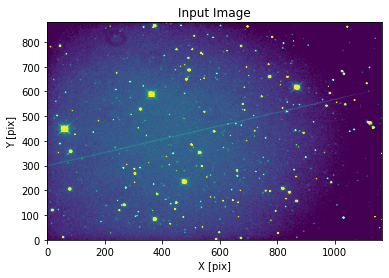

In [3]:
s = TrailFinder(image, processes=2,threshold=2,min_length=200, min_persistence=0.4, max_width=30)
#threshold = min snr as i see#1, but not at all #2
s.plot_image(overlay_mask=False)  

In [7]:
s.run_mrt()
print("mrt sources")
s.find_mrt_sources()
print("sources")
s.filter_sources(trim_catalog=True,plot_streak=False) #plot_streak=False
s.make_mask()
s.save_output()
print("source list (filter_sources):")
display(s.source_list[s.source_list['persistence']>0.1])


INFO:utils_findsat_mrt:Calculating median Radon Transform with 2 processes
INFO:findsat_mrt:Detection threshold: 2
INFO:findsat_mrt:Using kernel c:\Python310\lib\site-packages\acstools\data\rt_line_kernel_width15.fits


mrt sources


c:\Python310\lib\site-packages\photutils\detection\starfinder.py:324: RuntimeWarning: invalid value encountered in divide
  return moments / self.moments[:, 0, 0][:, np.newaxis, np.newaxis]
c:\Python310\lib\site-packages\photutils\detection\starfinder.py:315: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(self.flux)
INFO:findsat_mrt:{no} sources found using kernel: 16
INFO:findsat_mrt:14 sources found using kernel
INFO:findsat_mrt:Using kernel c:\Python310\lib\site-packages\acstools\data\rt_line_kernel_width7.fits
c:\Python310\lib\site-packages\photutils\detection\starfinder.py:324: RuntimeWarning: invalid value encountered in divide
  return moments / self.moments[:, 0, 0][:, np.newaxis, np.newaxis]
c:\Python310\lib\site-packages\photutils\detection\starfinder.py:315: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(self.flux)
INFO:findsat_mrt:{no} sources found using kernel: 19
INFO:findsat_mrt:17 sources found using kernel
IN

sources


INFO:utils_findsat_mrt:amplitude of feature: 38.046824473279685
baseline noise: 12.056288729198881
snr of feature = 2.1557658685740373
INFO:utils_findsat_mrt:width of feature = 64.88296345077379
INFO:utils_findsat_mrt:amplitude of feature: 12.50732979331741
baseline noise: 11.313014370150974
snr of feature = 0.10557004385299815
INFO:utils_findsat_mrt:width of feature = 18.463404274689083
INFO:utils_findsat_mrt:amplitude of feature: 39.3914203209448
baseline noise: 11.049711843187895
snr of feature = 2.564927382719891
INFO:utils_findsat_mrt:width of feature = 20.631471740998933
c:\Python310\lib\site-packages\acstools\utils_findsat_mrt.py:517: RuntimeWarning: divide by zero encountered in scalar divide
  dx = np.floor(subregion.shape[1] / nchunk)
INFO:utils_findsat_mrt:breaking into 2 sections for persistence check
Section size for persistence check: 439.0
INFO:utils_findsat_mrt:Checking persistence, step 1 of 2
INFO:utils_findsat_mrt:amplitude of feature: 59.12540257727713
baseline nois

source list (filter_sources):


id,xcentroid,ycentroid,fwhm,roundness,pa,max_value,flux,mag,theta,rho,endpoints,status,mean flux,width,snr,persistence
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,"float64[2,2]",int32,float64,float64,float64,float64
5,2.5118735551513462,692.4997433429425,12.7139860232211,0.9006529143205845,89.87795616443796,16.714353540738315,2266.0503623205086,-8.388173894262886,1.2559367775756731,-130.50025665705755,441.33289933106875 .. 879.0,2,12.087865419187011,20.631471740998933,2.564927382719891,0.5
8,150.07464234342734,809.2490688220922,12.608510832600885,0.7792372919472551,90.31372015152556,55.42938160955888,2883.6830660352116,-8.649868817792166,75.03732117171367,-13.750931177907773,0.0 .. 609.1400856454225,2,609.3866808134316,5.7037587481552805,43.826906182067404,1.0


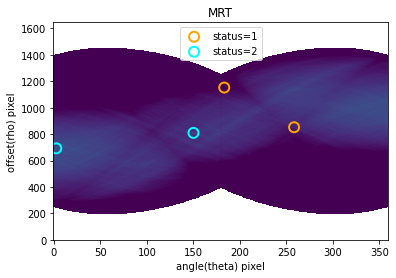

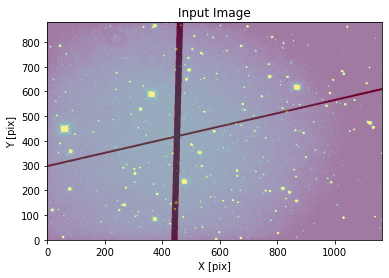

In [5]:
s.plot_mrt(show_sources=True)      # plots MRT with sources overlaid
s.plot_image(overlay_mask=True)    # plots input image with mask overlaid